In [108]:
# cleanup data and put them in the new csv files

import numpy as np
import scipy 
import pandas as pd
from sklearn import tree, ensemble, linear_model, svm, cross_validation, grid_search
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## load test data (this one does not need any more preprocessing)
test = np.genfromtxt("data/clean/test.csv",delimiter=",",skip_header=1)

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def normalize(x):
    return (x - x.mean()) / (x.max() - x.min())

# combine results
def output_results(predictions):
    test_t = pd.read_csv("data/original/test.csv")
    dates = test_t["datetime"]
    predictions = np.maximum(predictions,0.0)
    results = pd.DataFrame(predictions)
    dates = pd.DataFrame(dates)
    x = pd.concat([dates,results],axis=1)
    x.columns = ["datetime","count"]
    x.to_csv("data/result.csv",delimiter=",",index=False)

# set up two histograms to see how the distribution of variables 
# looks for the training and test labels
def hist_evaluate(train_lab, svr_pred):
    n, bins, patches = plt.hist(train_lab, 50, normed=1, facecolor='green', alpha=0.75)
    plt.show()

    n, bins, patches = plt.hist(svr_pred, 50, normed=1, facecolor='green', alpha=0.75)
    plt.show()

In [52]:
# import data to numpy
def process_train():
    train_comp = np.genfromtxt("data/clean/train.csv",delimiter=",",skip_header=1)
    # split data into train and validation
    np.random.shuffle(train_comp)
    y = train_comp[:,0]
    x = np.delete(train_comp,0,1)
    return cross_validation.train_test_split(x,y, test_size=0.4, random_state=1)

In [53]:
(train,valid,train_lab,valid_lab) = process_train()

In [54]:
# first attempt - SVR with all parameters

svr = svm.SVR()
svr.fit(train,train_lab)
svr_pred = svr.predict(valid)


1.4354827761565399

In [ ]:
rmsle(valid_lab, svr_pred)
# outputs around 1.43, terrible

In [81]:
# SVR with a limited columns
# it might make sense to try to use smaller set of vars: 1,2,5
temp_train = train[:,[1,2,5,6]]
temp_valid = valid[:,[1,2,5,6]]
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr_min = svm.SVR()
clf_svr_min = grid_search.GridSearchCV(svr_min,parameters)
clf_svr_min.fit(temp_train,train_lab)
svr_min_pred = clf_svr_min.predict(temp_valid)

-1.99889322389
0.535132859349


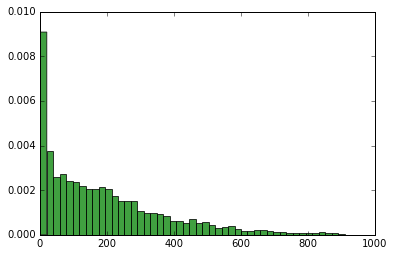

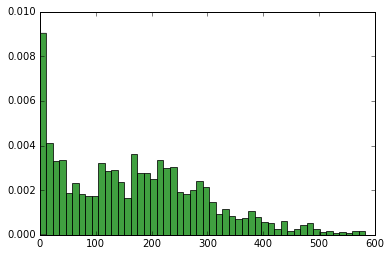

In [84]:
# SVR with a limited columns
# result evaluation

print svr_min_pred.min()
svr_min_pred = np.maximum(svr_min_pred,0.0)
print rmsle(valid_lab, svr_min_pred)
hist_evaluate(valid_lab, svr_min_pred)

# result: 0.53

In [107]:
temp_test = test[:,[1,2,5,6]]
svr_min_test_predict = clf_svr_min.predict(temp_test)
output_results(svr_min_test_predict)

In [103]:
test[:,0]

array([  16.,   40.,   32., ...,  168.,  129.,   88.])

In [87]:
# random forest classifier

clf_forest = ensemble.RandomForestRegressor()
clf_forest.fit(train,train_lab)
svr_pred_forest = clf_forest.predict(valid)

print svr_pred.min()
print svr_pred.max()

rmsle(valid_lab, svr_pred)

1.0
977.0


0.8230407301538806